In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import re
import codecs

import spacy
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [58]:
df_review = pd.read_csv('/Users/iris/Downloads/yelp_review.csv')
df_tip = pd.read_csv('/Users/iris/Downloads/yelp_tip.csv')

In [59]:
df_review.head(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0


In [60]:
df_tip.head(2)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw


In [61]:
df = df_review.merge(df_tip[['text','business_id','user_id']], on = ['business_id','user_id'])
#df1 = df1.merge(df2[['weeknum', 'datetime']], on=['weeknum'])

In [62]:
df_business = pd.read_csv('/Users/iris/Downloads/yelp_business.csv')

In [63]:
df_business.head(2)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...


In [64]:
df.head(2)

,review_id,user_id,business_id,stars,date,text_x,useful,funny,cool,text_y
0,YO54hQpIpY60GZBc0jzBDw,vaXJ7-xLrnD6FAEhUqYKwQ,poOnGeQlHEnWRAH9t_0KMg,5,2016-06-17,Great pizza and wings for the prize. Great fla...,0,0,0,Great pizza no wings for the prize
1,Ch_OvSABjH6bbxMetS9FUg,h7i58iukFZPAFgTF34mZJA,wvsadleYJavXp8u697GK6A,5,2011-07-22,Awsome place. See cindy shes great for nails. ...,6,0,1,Great place see cindy. Shes great


In [65]:
df = df.merge(df_business[['categories','business_id']], on = ['business_id'])

In [66]:
df.head(2)

,review_id,user_id,business_id,stars,date,text_x,useful,funny,cool,text_y,categories
0,YO54hQpIpY60GZBc0jzBDw,vaXJ7-xLrnD6FAEhUqYKwQ,poOnGeQlHEnWRAH9t_0KMg,5,2016-06-17,Great pizza and wings for the prize. Great fla...,0,0,0,Great pizza no wings for the prize,Pizza;Restaurants
1,q7eMhn7eI-IGWPW-nopvJg,OeQ75FJxgprciKQ1JrSMJg,poOnGeQlHEnWRAH9t_0KMg,5,2016-11-19,Fantastic food & great service! The crust of t...,0,0,0,Fantastic food & great service! We will visit ...,Pizza;Restaurants


In [67]:
df = df[df['categories'].str.contains('Restaurants')]

In [68]:
df.head(2)

,review_id,user_id,business_id,stars,date,text_x,useful,funny,cool,text_y,categories
0,YO54hQpIpY60GZBc0jzBDw,vaXJ7-xLrnD6FAEhUqYKwQ,poOnGeQlHEnWRAH9t_0KMg,5,2016-06-17,Great pizza and wings for the prize. Great fla...,0,0,0,Great pizza no wings for the prize,Pizza;Restaurants
1,q7eMhn7eI-IGWPW-nopvJg,OeQ75FJxgprciKQ1JrSMJg,poOnGeQlHEnWRAH9t_0KMg,5,2016-11-19,Fantastic food & great service! The crust of t...,0,0,0,Fantastic food & great service! We will visit ...,Pizza;Restaurants


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278322 entries, 0 to 432116
Data columns (total 11 columns):
review_id      278322 non-null object
user_id        278322 non-null object
business_id    278322 non-null object
stars          278322 non-null int64
date           278322 non-null object
text_x         278322 non-null object
useful         278322 non-null int64
funny          278322 non-null int64
cool           278322 non-null int64
text_y         278321 non-null object
categories     278322 non-null object
dtypes: int64(4), object(7)
memory usage: 25.5+ MB


In [70]:
df.describe()

,stars,useful,funny,cool
count,278322.000000,278322.000000,278322.000000,278322.000000
mean,4.047477,2.063588,0.977045,1.300990
std,1.194337,5.222447,4.122229,4.069802
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000
75%,5.000000,2.000000,1.000000,1.000000
max,5.000000,786.000000,681.000000,228.000000


In [71]:
df.rename(columns = {'text_x':'review_text'}, inplace = True)

In [72]:
df.rename(columns = {'text_y':'tip_text'}, inplace = True)

In [73]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'review_text',
       'useful', 'funny', 'cool', 'tip_text', 'categories'],
      dtype='object')

In [74]:
df = df.drop(['date','useful','funny','cool'], axis = 1)
df.head(2)

,review_id,user_id,business_id,stars,review_text,tip_text,categories
0,YO54hQpIpY60GZBc0jzBDw,vaXJ7-xLrnD6FAEhUqYKwQ,poOnGeQlHEnWRAH9t_0KMg,5,Great pizza and wings for the prize. Great fla...,Great pizza no wings for the prize,Pizza;Restaurants
1,q7eMhn7eI-IGWPW-nopvJg,OeQ75FJxgprciKQ1JrSMJg,poOnGeQlHEnWRAH9t_0KMg,5,Fantastic food & great service! The crust of t...,Fantastic food & great service! We will visit ...,Pizza;Restaurants


In [75]:
#dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]
df['total_text'] = df['review_text'].map(str) + df['tip_text']

In [76]:
df.head(5)

,review_id,user_id,business_id,stars,review_text,tip_text,categories,total_text
0,YO54hQpIpY60GZBc0jzBDw,vaXJ7-xLrnD6FAEhUqYKwQ,poOnGeQlHEnWRAH9t_0KMg,5,Great pizza and wings for the prize. Great fla...,Great pizza no wings for the prize,Pizza;Restaurants,Great pizza and wings for the prize. Great fla...
1,q7eMhn7eI-IGWPW-nopvJg,OeQ75FJxgprciKQ1JrSMJg,poOnGeQlHEnWRAH9t_0KMg,5,Fantastic food & great service! The crust of t...,Fantastic food & great service! We will visit ...,Pizza;Restaurants,Fantastic food & great service! The crust of t...
2,OqBntzXW9HMjj-URJ4maQw,E9GB199tS9hUdolCzJQSWA,poOnGeQlHEnWRAH9t_0KMg,5,Prompt service. Great food. I had the persona...,Yummy,Pizza;Restaurants,Prompt service. Great food. I had the persona...
3,iAlleZpr9Ft_PlOJKJBo6Q,v9jVqXiGMEOmT7Z7uQh1jQ,poOnGeQlHEnWRAH9t_0KMg,4,"Clean place, friendly staff. Pizza was delicio...","Clean place, friendly staff. Recommended.",Pizza;Restaurants,"Clean place, friendly staff. Pizza was delicio..."
4,ijqMDKCxwqfwzSbl3-co8A,OYUs6dWxPlQhg7NJjuJ3FQ,poOnGeQlHEnWRAH9t_0KMg,5,Really awesome pizza and wings! The salad was ...,"Salads are fabulous, calzone is delicious ! Ma...",Pizza;Restaurants,Really awesome pizza and wings! The salad was ...


In [77]:
#df.loc[df.review_id == 'ijqMDKCxwqfwzSbl3-co8A', 'total_text'].iloc[0]

In [80]:
##keep the reviews only to popular restaurants
df_review = df[df['categories'].str.contains('Restaurants')]

,review_id,user_id,business_id,stars,review_text,tip_text,categories,total_text
0,YO54hQpIpY60GZBc0jzBDw,vaXJ7-xLrnD6FAEhUqYKwQ,poOnGeQlHEnWRAH9t_0KMg,5,Great pizza and wings for the prize. Great fla...,Great pizza no wings for the prize,Pizza;Restaurants,Great pizza and wings for the prize. Great fla...
1,q7eMhn7eI-IGWPW-nopvJg,OeQ75FJxgprciKQ1JrSMJg,poOnGeQlHEnWRAH9t_0KMg,5,Fantastic food & great service! The crust of t...,Fantastic food & great service! We will visit ...,Pizza;Restaurants,Fantastic food & great service! The crust of t...
2,OqBntzXW9HMjj-URJ4maQw,E9GB199tS9hUdolCzJQSWA,poOnGeQlHEnWRAH9t_0KMg,5,Prompt service. Great food. I had the persona...,Yummy,Pizza;Restaurants,Prompt service. Great food. I had the persona...
3,iAlleZpr9Ft_PlOJKJBo6Q,v9jVqXiGMEOmT7Z7uQh1jQ,poOnGeQlHEnWRAH9t_0KMg,4,"Clean place, friendly staff. Pizza was delicio...","Clean place, friendly staff. Recommended.",Pizza;Restaurants,"Clean place, friendly staff. Pizza was delicio..."
4,ijqMDKCxwqfwzSbl3-co8A,OYUs6dWxPlQhg7NJjuJ3FQ,poOnGeQlHEnWRAH9t_0KMg,5,Really awesome pizza and wings! The salad was ...,"Salads are fabulous, calzone is delicious ! Ma...",Pizza;Restaurants,Really awesome pizza and wings! The salad was ...


## Text clean up

In [81]:
df_review = df_review.drop(['review_id','user_id','business_id'],axis=1)
df_review.head()

,stars,review_text,tip_text,categories,total_text
0,5,Great pizza and wings for the prize. Great fla...,Great pizza no wings for the prize,Pizza;Restaurants,Great pizza and wings for the prize. Great fla...
1,5,Fantastic food & great service! The crust of t...,Fantastic food & great service! We will visit ...,Pizza;Restaurants,Fantastic food & great service! The crust of t...
2,5,Prompt service. Great food. I had the persona...,Yummy,Pizza;Restaurants,Prompt service. Great food. I had the persona...
3,4,"Clean place, friendly staff. Pizza was delicio...","Clean place, friendly staff. Recommended.",Pizza;Restaurants,"Clean place, friendly staff. Pizza was delicio..."
4,5,Really awesome pizza and wings! The salad was ...,"Salads are fabulous, calzone is delicious ! Ma...",Pizza;Restaurants,Really awesome pizza and wings! The salad was ...


In [82]:
df_review.isnull().any()

stars          False
review_text    False
tip_text        True
categories     False
total_text      True
dtype: bool

In [86]:
df_review = df_review.dropna()
df_review.isnull().any()
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278321 entries, 0 to 432116
Data columns (total 5 columns):
stars          278321 non-null int64
review_text    278321 non-null object
tip_text       278321 non-null object
categories     278321 non-null object
total_text     278321 non-null object
dtypes: int64(1), object(4)
memory usage: 12.7+ MB


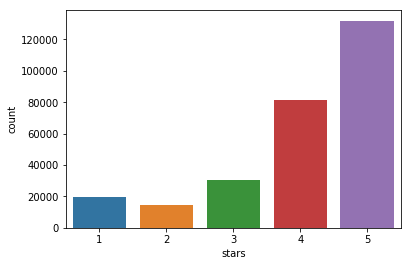

In [87]:
sns.countplot(df_review.stars);

In [88]:
df_review.head(2)

,stars,review_text,tip_text,categories,total_text
0,5,Great pizza and wings for the prize. Great fla...,Great pizza no wings for the prize,Pizza;Restaurants,Great pizza and wings for the prize. Great fla...
1,5,Fantastic food & great service! The crust of t...,Fantastic food & great service! We will visit ...,Pizza;Restaurants,Fantastic food & great service! The crust of t...


In [89]:
df_review['label'] = df_review['stars'].apply(lambda x: 1 if x>3 else 0)
df_review = df_review.drop('stars',axis=1)
df_review.head()

,review_text,tip_text,categories,total_text,label
0,Great pizza and wings for the prize. Great fla...,Great pizza no wings for the prize,Pizza;Restaurants,Great pizza and wings for the prize. Great fla...,1
1,Fantastic food & great service! The crust of t...,Fantastic food & great service! We will visit ...,Pizza;Restaurants,Fantastic food & great service! The crust of t...,1
2,Prompt service. Great food. I had the persona...,Yummy,Pizza;Restaurants,Prompt service. Great food. I had the persona...,1
3,"Clean place, friendly staff. Pizza was delicio...","Clean place, friendly staff. Recommended.",Pizza;Restaurants,"Clean place, friendly staff. Pizza was delicio...",1
4,Really awesome pizza and wings! The salad was ...,"Salads are fabulous, calzone is delicious ! Ma...",Pizza;Restaurants,Really awesome pizza and wings! The salad was ...,1


In [91]:
nlp = spacy.load('en')

In [94]:
text = df_review.total_text.values
label = df_review.label.values

In [95]:
text[0]

'Great pizza and wings for the prize. Great flavor! Wings were very good. Timely in the order.Great pizza no wings for the prize'

In [97]:
for i,sentance in enumerate(parsed_text.sents):
    print(i,':',sentance)

0 : Great pizza and wings for the prize.
1 : Great flavor!
2 : Wings were very good.
3 : Timely in the order.
4 : Great pizza no wings for the prize


In [99]:
token_pos = [token.pos_ for token in nlp(text[10])]
tokens = [token for token in nlp(text[10])]
sd = list(zip(tokens,token_pos))
sd = pd.DataFrame(sd,columns=['token','pos'])

In [102]:
max_num_words = 1000
max_seq_length = 100

tokenizer = Tokenizer(num_words = max_num_words)

In [104]:
len(text)

278321

In [105]:
df_review.head(2)

,review_text,tip_text,categories,total_text,label
0,Great pizza and wings for the prize. Great fla...,Great pizza no wings for the prize,Pizza;Restaurants,Great pizza and wings for the prize. Great fla...,1
1,Fantastic food & great service! The crust of t...,Fantastic food & great service! We will visit ...,Pizza;Restaurants,Fantastic food & great service! The crust of t...,1


In [114]:
review_clean = df_review[['total_text','label']].copy()
review_clean.head()

,total_text,label
0,Great pizza and wings for the prize. Great fla...,1
1,Fantastic food & great service! The crust of t...,1
2,Prompt service. Great food. I had the persona...,1
3,"Clean place, friendly staff. Pizza was delicio...",1
4,Really awesome pizza and wings! The salad was ...,1


In [115]:
def  standardize_text (df, text_field):
    
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

review_clean = standardize_text(review_clean, "total_text")

review_clean.to_csv("clean_data.csv")
review_clean.head()

,total_text,label
0,great pizza and wings for the prize great fla...,1
1,fantastic food great service! the crust of t...,1
2,prompt service great food i had the persona...,1
3,"clean place, friendly staff pizza was delicio...",1
4,really awesome pizza and wings! the salad was ...,1


In [116]:
review_clean.groupby("label").count()

,total_text
label,
0,64786
1,213535


In [118]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

review_clean['tokens'] = review_clean['total_text'].apply(tokenizer.tokenize)
review_clean.head()

,total_text,label,tokens
0,great pizza and wings for the prize great fla...,1,"[great, pizza, and, wings, for, the, prize, gr..."
1,fantastic food great service! the crust of t...,1,"[fantastic, food, great, service, the, crust, ..."
2,prompt service great food i had the persona...,1,"[prompt, service, great, food, i, had, the, pe..."
3,"clean place, friendly staff pizza was delicio...",1,"[clean, place, friendly, staff, pizza, was, de..."
4,really awesome pizza and wings! the salad was ...,1,"[really, awesome, pizza, and, wings, the, sala..."


In [126]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [130]:
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()

lemma_s = []
for elem in review_clean.tokens:
    for word in elem:
        lemmatized = lmtzr.lemmatize(word)
        lemma_s.append(lemmatized)


KeyboardInterrupt: 

In [134]:
lemma_s[:10]

['great',
 'pizza',
 'and',
 'wing',
 'for',
 'the',
 'prize',
 'great',
 'flavor',
 'wing']

In [119]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in review_clean["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in review_clean["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

36718726 words total, with a vocabulary size of 143829
Max sentence length is 1107


## Bag of words

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

#list_corpus_sample = list_corpus.sample(frac = .20)
#list_labels_sample = list_labels_sample(frac = .20)

list_corpus = review_clean['total_text'].tolist()
list_labels = review_clean['label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [144]:
X_test_counts_subset = X_test_counts.sample(frac=0.1)

AttributeError: sample not found

In [137]:
list_corpus[:2]

['great pizza and wings for the prize  great flavor! wings were very good  timely in the order great pizza no wings for the prize',
 'fantastic food   great service! the crust of the pizza was light   crispy, the salads were fresh and delicious  we will visit every time we come to tempe fantastic food   great service! we will visit every time we come to tempe ']

In [138]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

## run on subset as the full one is too large
clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=42)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

Process ForkPoolWorker-12:
Process ForkPoolWorker-11:
Process ForkPoolWorker-10:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/iris/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


KeyboardInterrupt: 

In [ ]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

## LDA

In [145]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [151]:
print(type(list_corpus))
len(list_corpus)

<class 'list'>


278321

In [158]:
list_text = review_clean.tokens[:5000]

no_features = 1000

count_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
emb = count_vectorizer.fit_transform(df)

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english',tokenizer=lambda doc: doc, lowercase=False)
tfidf = tfidf_vectorizer.fit_transform(list_text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english',tokenizer=lambda doc: doc, lowercase=False)
tf = tf_vectorizer.fit_transform(list_text)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 2

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
s t good like just time place ve really m
Topic 1:
great food service place atmosphere love good amazing beer awesome
Topic 0:
food great place good s t service love like beer
Topic 1:
s t like just time good order try place ordered


In [160]:
no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 15
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
t s like just time really m don ve order menu got ordered came didn
Topic 1:
great atmosphere staff food place music selection service wine prices menu attentive fun try spot
Topic 2:
tea boba milk green kung fu drink ice uuu taro sugar jelly suzuya s sweetness
Topic 3:
pizza bianco wait night margherita crust special blah pizzas pizzeria week world chris s rosemary
Topic 4:
foods oriental store laotian recipes market eat sister asian nearly medium s spicy 10 enjoy
Topic 5:
beer beers peaks tap ale selection peach chocolate brewery awesome patio food brew pumpkin bar
Topic 6:
thai chicken pad curry rice fried beef spicy soup noodle basil lunch restaurant noodles dish
Topic 7:
happy hour 5 drinks 3 steaks 2 half bar 6 cocktails 1 specials hh steak
Topic 8:
love place favorite staff friendly friends feel try wine awesome s food nice super yummy
Topic 9:
good really pretty food nice prices place atmosphere favorite selection like yummy cool try soup
Topic 10:
breakfast buzz eggs 

In [161]:
no_topics = 50

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 15
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
t like just don time order really m didn came got ve menu ordered think
Topic 1:
great music service menu try prices selection come price definitely attentive brunch time fantastic lots
Topic 2:
boba tea milk kung fu drink taro jelly sugar honey drinks sweetness green bean free
Topic 3:
pizza crust pizzas bianco pizzeria oven toppings phoenix italian margherita mozzarella ingredients places lunch parking
Topic 4:
foods oriental laotian store recipes market eat sister asian nearly medium spicy 10 enjoy s
Topic 5:
beer beers selection tap ale food peach peaks brewery pumpkin patio dip parking tastes live
Topic 6:
soup spicy tofu seafood noodle yum noodles lunch salad broth pork yummy served favorites pot
Topic 7:
happy hour half drinks steaks cocktails 6 menu hh specials close daily 3 rye 30
Topic 8:
love yummy feel spot coming healthy food super friends place location patio especially open come
Topic 9:
good really pretty prices like selection bread try french flavor cool dinne

## pyLDA

In [163]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(review_clean.total_text)
print(dtm_tf.shape)

(278321, 28135)


In [164]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(review_clean.total_text)
print(dtm_tfidf.shape)

(278321, 28135)


## Fit Latent Dirichlet Allocation models

In [165]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_topics=10, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


KeyboardInterrupt: 

In [183]:
subbiesub = dtm_tf[:20000]
print(subbiesub.shape)

(20000, 28135)


In [184]:
import time

start = time.time()
lda_tf = LatentDirichletAllocation(n_topics=30, random_state=0)
lda_tf.fit(subbiesub1)


end = time.time()
print(end - start)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


260.8932569026947


In [185]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/iris/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
/Users/iris/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
23     0.294302 -0.036617       1        1  33.029650
22     0.227528  0.000587       2        1   9.963829
11     0.169908  0.180692       3        1   6.332494
21     0.264949 -0.064464       4        1   6.264154
8      0.147092  0.217478       5        1   5.049478
13     0.165261 -0.221583       6        1   3.286764
17     0.096269 -0.224925       7        1   3.202894
20     0.097972 -0.024367       8        1   3.180274
6      0.140598 -0.060438       9        1   2.872896
28     0.031350  0.120549      10        1   2.622832
15     0.034308 -0.145419      11        1   2.397006
7      0.038676  0.023711      12        1   2.232024
0      0.077984 -0.027865      13        1   1.710566
12     0.010635  0.155487      14        1   1.666908
26    -0.045712  0.076401      15        1   1.627689
9     -0.043098  0.056837      16        1   1.510296
25     0.040121  0.065512      17        1   1.489536
29    -0.008949  0.153788      18        1   1.352970
10    -0.119066  0.054424      19        1   1.303736
19    -0.108709 -0.012380      20        1   1.143226
14    -0.157913 -0.044136      21        1   0.943750
27    -0.147393  0.008026      22        1   0.936576
24    -0.138442  0.063764      23        1   0.928401
5     -0.145486 -0.033656      24        1   0.902696
4     -0.149688 -0.034623      25        1   0.736553
2     -0.159501 -0.041514      26        1   0.714899
3     -0.140905 -0.026685      27        1   0.698765
16    -0.156298 -0.043598      28        1   0.669276
1     -0.148349 -0.105314      29        1   0.621464
18    -0.167443 -0.029674      30        1   0.608399, topic_info=      Category           Freq         Term          Total  loglift  logprob
term                                                                       
10892  Default  178391.000000        great  178391.000000  30.0000  30.0000
10671  Default  207423.000000         good  207423.000000  29.0000  29.0000
18697  Default  192375.000000        place  192375.000000  28.0000  28.0000
22126  Default  127681.000000      service  127681.000000  27.0000  27.0000
26694  Default   51449.000000        vegas   51449.000000  26.0000  26.0000
18676  Default   47606.000000        pizza   47606.000000  25.0000  25.0000
2216   Default   85600.000000         best   85600.000000  24.0000  24.0000
14645  Default   86448.000000         love   86448.000000  23.0000  23.0000
3347   Default   41698.000000       burger   41698.000000  22.0000  22.0000
4323   Default   44960.000000       cheese   44960.000000  21.0000  21.0000
24429  Default   30135.000000        sushi   30135.000000  20.0000  20.0000
4413   Default   66335.000000      chicken   66335.000000  19.0000  19.0000
9950   Default   32817.000000        fries   32817.000000  18.0000  18.0000
9942   Default   49096.000000     friendly   49096.000000  17.0000  17.0000
2970   Default   30618.000000    breakfast   30618.000000  16.0000  16.0000
23669  Default   45825.000000        staff   45825.000000  15.0000  15.0000
715    Default   53347.000000      amazing   53347.000000  14.0000  14.0000
2062   Default   31829.000000         beer   31829.000000  13.0000  13.0000
1582   Default   40994.000000      awesome   40994.000000  12.0000  12.0000
14285  Default  127186.000000         like  127186.000000  11.0000  11.0000
1820   Default   44046.000000          bar   44046.000000  10.0000  10.0000
16704  Default   33687.000000        night   33687.000000   9.0000   9.0000
20111  Default   84361.000000       really   84361.000000   8.0000   8.0000
3253   Default   27225.000000       buffet   27225.000000   7.0000   7.0000
21638  Default   44587.000000        sauce   44587.000000   6.0000   6.0000
19307  Default   42419.000000       pretty   42419.000000   5.0000   5.0000
12013  Default   30820.000000          hot   30820.000000   4.0000   4.0000
4974   Default   24307.00